# [9660] Homework 5 - Multi-model
Data file: https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Framingham_heart_disease_4000.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 6:05 PM on the due date
  * No late submission will be accepted
* You must submit a cleanly executed notebook (*.ipynb)
  * Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 5 Requirements
* Load data
* Examine data
  * Display (e.g. bar chart) class distribution of target variable (TenYearCHD)
* Prepare data for model training
  * Perform the following data preparation steps
    * Handle missing values
    * Variable encoding
    * Feature scaling
    * Principal component analysis (PCA)
      * NOTE: Binary variables are not ideal for Principal Component Analysis (PCA), particularly because PCA is designed for continuous, normally distributed data  
  * Do not delete any rows
  * Do not drop any columns, EXCEPT when performing variable encoding and PCA
* Display a sample of 20 rows of the final set of independent variables used for all the model trainings
* Train logistic regression model
  * Must set **class_weight** hyperparameter AND at least 1 other hyperparameter (not including random_state)
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
  * Calculate and display model accuracy
    * **NOTE: Logistic regression model accuracy must exceed 65%**
* Train the following classification models (KNN, Random Forest & SVC).  For the SVC model, you can use any SVC classifier.  Perform the following for each model:
  * Must modify at least 2 hyperparameters (not including random_state) in each model
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
    * For random forest and SVC, use the same class_weight hyperparameter value used for logistic regression
    * If you used hyperparameter random_state in your Logistic Regression model training, use the same value when training the other models
    * Do NOT re-split training and test sets when training the other models
  * Calculate and display this model's accuracy
    * **NOTE: For each of these 3 classification models, model accuracy MUST exceed 80%**
* Display (e.g. bar chart) model accuracy for all 4 models

#### NOTES
- You must TRY to resolve all errors and warnings
- You may set random_state hyperparameter to control the accuracy output

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 12/10/24 20:31:49


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add other imports as needed
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Load data

Objective  
> Predict if a patient has a 10-year risk of developing coronary heart disease (CHD).

Problem  
> The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression Data Preparation

Source
> The source dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

> **NOTE: The professor has modified this dataset for the purposes of this assignment.  You must use this modified dataset for this homework.**

Demographic Attributes:
> gender: Male / Female  
> age: integer  
> attended_college: whether or not the patient attended college

Behavioral Attributes:
> currentSmoker: whether or not the patient is a current smoker  
> cigsPerDay: the number of cigarettes that the person smoked on average in one day

Medical History Attributes:
> BPMeds: whether or not the patient was on blood pressure medication  
> prevalentStroke: whether or not the patient had previously had a stroke  
> prevalentHyp: whether or not the patient was hypertensive  
> diabetes: whether or not the patient had diabetes.

Current Medical Condition Attributes (continuous variables):
> totChol: total cholesterol level  
> sysBP: systolic blood pressure  
> diaBP: diastolic blood pressure  
> BMI: Body Mass Index  
> heartRate: heart rate  
> glucose: glucose level  

Target variable to predict:
> TenYearCHD: 10 year risk of coronary heart disease (CHD)

In [3]:
# Read data from file (Framingham_heart_disease_4000.csv) into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9660/main/data/Framingham_heart_disease_4000.csv')

### Examine data

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# Review dataframe shape
df.shape

(4000, 16)

In [6]:
# Display a sample of 5 rows from dataframe
df.sample(5)

,gender,age,attended_college,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1984,Female,56,NaN,Yes,5.0,no,NO,no,N,285.0,124.0,80.0,24.54,52.0,106.0,N
2526,Female,41,n,Yes,20.0,no,NO,no,N,223.0,114.0,72.0,26.42,78.0,NaN,N
2684,Male,47,n,Yes,30.0,no,NO,no,N,260.0,126.0,91.0,27.01,75.0,84.0,N
3170,Male,43,y,Yes,20.0,no,NO,no,N,187.0,129.5,88.0,25.62,80.0,75.0,N
3245,Male,65,y,No,0.0,no,NO,no,N,207.0,139.0,88.0,24.04,80.0,73.0,N


### Display bar chart showing class distribution for target variable (TenYearCHD)

In [7]:
# Display class distribution counts
df['TenYearCHD'].value_counts()

,count
TenYearCHD,
N,3402
Y,598


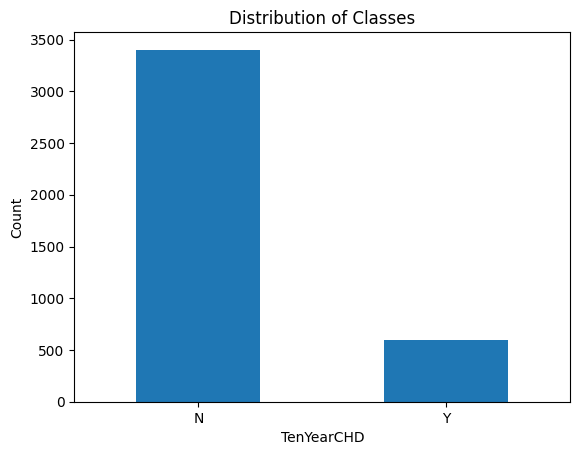

In [8]:
# Display bar chart showing class distribution
df['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.xticks(rotation=0)
plt.show()

### Prepare data for model training
* Do not delete any rows
* Do not drop any columns, EXCEPT when performing variable encoding and PCA

#### Check for missing values

In [9]:
df.isna().sum()

,0
gender,0
age,0
attended_college,100
currentSmoker,0
cigsPerDay,27
BPMeds,48
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,49


#### Use the SimpleImputer to replace missing values

In [10]:
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

cols_to_impute_1 = ['attended_college']
df[cols_to_impute_1] = imp_most_freq.fit_transform(df[cols_to_impute_1])

cols_to_impute_2 = ['BPMeds']
df[cols_to_impute_2] = imp_most_freq.fit_transform(df[cols_to_impute_2])

In [11]:
df.groupby('TenYearCHD')['cigsPerDay'].mean()

,cigsPerDay
TenYearCHD,
N,8.782055
Y,10.305369


In [12]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df.groupby('TenYearCHD')['cigsPerDay'].transform('mean'))

In [13]:
df.groupby('TenYearCHD')['totChol'].mean()

,totChol
TenYearCHD,
N,234.917311
Y,245.234295


In [14]:
df['totChol'] = df['totChol'].fillna(df.groupby('TenYearCHD')['totChol'].transform('mean'))

In [15]:
df.groupby('TenYearCHD')['BMI'].mean()

,BMI
TenYearCHD,
N,25.661520
Y,26.586854


In [16]:
df['BMI'] = df['BMI'].fillna(df.groupby('TenYearCHD')['BMI'].transform('mean'))

In [17]:
df.groupby('TenYearCHD')['glucose'].mean()

,glucose
TenYearCHD,
N,80.638015
Y,89.858696


In [18]:
df['glucose'] = df['glucose'].fillna(df.groupby('TenYearCHD')['glucose'].transform('mean'))

#### Check for missing values again

In [19]:
df.isna().sum()

,0
gender,0
age,0
attended_college,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


### Perform variable encoding

In [20]:
oe_currentSmoker = OrdinalEncoder(categories=[['Yes','No']])
df['currentSmoker'] = oe_currentSmoker.fit_transform(df[['currentSmoker']])

In [21]:
oe_BPMeds = OrdinalEncoder(categories=[['yes','no']])
df['BPMeds'] = oe_BPMeds.fit_transform(df[['BPMeds']])

In [22]:
oe_prevalentStroke = OrdinalEncoder(categories=[['YES','NO']])
df['prevalentStroke'] = oe_prevalentStroke.fit_transform(df[['prevalentStroke']])

In [23]:
oe_prevalentHyp = OrdinalEncoder(categories=[['yes','no']])
df['prevalentHyp'] = oe_prevalentHyp.fit_transform(df[['prevalentHyp']])

In [24]:
oe_diabetes = OrdinalEncoder(categories=[['Y','N']])
df['diabetes'] = oe_diabetes.fit_transform(df[['diabetes']])

In [25]:
df = pd.get_dummies(df, columns=['gender', 'attended_college'], dtype=int)

In [26]:
le = LabelEncoder()
df['TenYearCHD'] = le.fit_transform(df['TenYearCHD'])

In [27]:
df.sample(5)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,gender_Female,gender_Male,attended_college_n,attended_college_y
780,51,0.0,18.0,1.0,1.0,0.0,1.0,176.0,146.0,94.0,27.42,80.0,85.0,0,1,0,1,0
1419,47,1.0,0.0,1.0,1.0,1.0,1.0,274.0,127.0,86.0,21.93,90.0,83.0,0,1,0,0,1
2824,47,0.0,1.0,1.0,1.0,1.0,1.0,183.0,112.5,73.0,24.27,68.0,80.0,0,0,1,1,0
3629,39,0.0,40.0,1.0,1.0,1.0,1.0,209.0,134.0,82.0,28.34,70.0,75.0,0,0,1,1,0
3252,47,1.0,0.0,1.0,1.0,1.0,1.0,259.0,139.0,79.0,29.34,70.0,71.0,1,0,1,1,0


### Separate independent and dependent variables
* Independent variables: All variables EXCEPT TenYearCHD
* Dependent variable: TenYearCHD

In [28]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

#### Standardize the independent variables

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Perform principal component analysis (PCA)

In [30]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,gender_Female,gender_Male,attended_college_n,attended_college_y
0,-0.881002,-1.016130,0.504718,-5.686241,0.079305,-1.492786,0.163383,-0.326191,0.486621,0.766307,0.386821,0.180700,0.300675,-1.157230,1.157230,0.612793,-0.612793
1,-0.764096,-1.016130,2.611147,0.175863,0.079305,-1.492786,0.163383,-0.371308,1.484423,1.855778,1.290139,-0.069173,1.377052,-1.157230,1.157230,0.612793,-0.612793
2,1.106396,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.012188,-0.034957,0.095863,-0.398992,1.180194,0.515950,-1.157230,1.157230,0.612793,-0.612793
3,0.755679,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.553596,0.577331,-0.490775,0.213012,-0.235756,0.559005,0.864132,-0.864132,0.612793,-0.612793
4,-0.881002,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.205978,-0.964727,-0.993608,-1.473671,-0.818794,-0.043766,0.864132,-0.864132,-1.631871,1.631871


In [31]:
X_scaled_NOpca = X_scaled_df.drop(['totChol','sysBP','diaBP','BMI','heartRate','glucose'], axis=1)
X_scaled_NOpca.head()

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,gender_Female,gender_Male,attended_college_n,attended_college_y
0,-0.881002,-1.016130,0.504718,-5.686241,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793
1,-0.764096,-1.016130,2.611147,0.175863,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793
2,1.106396,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793
3,0.755679,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793
4,-0.881002,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,-1.631871,1.631871


In [32]:
X_scaled_continuous_variables = X_scaled_df.drop(['age','cigsPerDay','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes',
                                        'gender_Female','gender_Male','attended_college_n','attended_college_y'], axis=1)
X_scaled_continuous_variables.head()

,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-0.326191,0.486621,0.766307,0.386821,0.180700,0.300675
1,-0.371308,1.484423,1.855778,1.290139,-0.069173,1.377052
2,0.012188,-0.034957,0.095863,-0.398992,1.180194,0.515950
3,0.553596,0.577331,-0.490775,0.213012,-0.235756,0.559005
4,-1.205978,-0.964727,-0.993608,-1.473671,-0.818794,-0.043766


In [33]:
pca = decomposition.PCA(n_components=1, random_state=42)
X_pca = pca.fit_transform(X_scaled_continuous_variables)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1'])
X_pca_df.head()

,PC1
0,0.905564
1,2.599183
2,0.233044
3,0.302689
4,-2.240015


In [34]:
df_new = pd.concat([X_scaled_NOpca, X_pca_df], axis=1)

### Display a sample of 20 rows from the final set of independent variables used for all the model trainings

In [35]:
df_new.sample(20)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,gender_Female,gender_Male,attended_college_n,attended_college_y,PC1
2229,0.755679,0.984126,-0.759139,0.175863,0.079305,-1.492786,0.163383,-1.157230,1.157230,0.612793,-0.612793,0.929579
197,-0.530284,-1.016130,0.926004,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,-1.631871,1.631871,-1.201567
447,-1.348625,-1.016130,-0.000825,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793,-0.929780
2690,-0.764096,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793,-0.073094
970,-0.296473,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793,1.234082
419,-0.179567,-1.016130,-0.674882,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793,0.300280
2198,-0.647190,-1.016130,1.768576,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,0.612793,-0.612793,-0.626516
2372,-1.231719,0.984126,-0.759139,0.175863,0.079305,0.669888,0.163383,-1.157230,1.157230,0.612793,-0.612793,-1.950750
59,-0.764096,-1.016130,0.926004,0.175863,0.079305,-1.492786,0.163383,0.864132,-0.864132,0.612793,-0.612793,1.318462
3678,-0.179567,-1.016130,0.673232,0.175863,0.079305,0.669888,0.163383,0.864132,-0.864132,-1.631871,1.631871,0.009396


### Display a sample of 5 rows from the final set of dependent variables used for all the model trainings

In [36]:
y.sample(5)

,TenYearCHD
3565,0
3912,0
335,0
2994,0
1933,0


### Split data into training and test sets

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.30, random_state=42, stratify=y)

### Train Logistic Regression model
#### Must set **class_weight** hyperparameter AND at least 1 other hyperparameter (not including random_state)

In [38]:
LogReg = LogisticRegression(class_weight='balanced', max_iter=300, C=0.1)
LogReg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=300)

### Evaluate Logistic Regression model

In [39]:
# Calculate and display model accuracy
LogReg_accuracy = LogReg.score(X_test, y_test)
print("Logistic Regression Accuracy =", round((LogReg_accuracy * 100), 2),"%")

Logistic Regression Accuracy = 67.5 %


In [40]:
LogReg_predictions = LogReg.predict(X_test)
print(classification_report(y_test, LogReg_predictions))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1021
           1       0.27      0.68      0.38       179

    accuracy                           0.68      1200
   macro avg       0.60      0.68      0.58      1200
weighted avg       0.83      0.68      0.72      1200



### Train KNN classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [41]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

### Evaluate KNN model

In [42]:
# Calculate and display model accuracy
knn_accuracy = knn.score(X_test, y_test)
print("KNN Accuracy =", round((knn_accuracy * 100), 2),"%")

KNN Accuracy = 85.08 %


### Train Random Forest classifier model
#### Must use same **class_weight** hyperparameter value used for logistic regression and change at least 1 other hyperparameter (excluding random_state)

In [43]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=500)

### Evaluate Random Forest model

In [44]:
# Calculate and display model accuracy
rf_accuracy = rf.score(X_test, y_test)
print("Random Forest Accuracy =", round((rf_accuracy * 100), 2),"%")

Random Forest Accuracy = 82.33 %


### Train Support Vector Classifier model
#### You can use any SVC classifier
#### Must use same **class_weight** hyperparameter value used for logistic regression and change at least 1 other hyperparameter (excluding random_state)

In [45]:
svc = NuSVC(class_weight='balanced', nu=0.1, kernel='poly', coef0=0.1)
svc.fit(X_train, y_train)

NuSVC(class_weight='balanced', coef0=0.1, kernel='poly', nu=0.1)

### Evaluate Support Vector Classifier model

In [46]:
# Calculate and display model accuracy
svc_accuracy = svc.score(X_test, y_test)
print("SVC Accuracy =", round((svc_accuracy * 100), 2),"%")

SVC Accuracy = 84.5 %


### Display bar chart comparison of accuracy for all 4 models

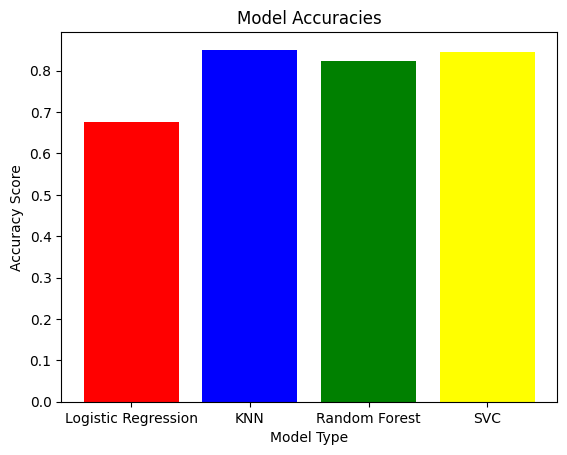

In [47]:
accuracy_scores = [LogReg_accuracy, knn_accuracy, rf_accuracy, svc_accuracy]
names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']

colors = ['red','blue','green','yellow']
plt.bar(names, accuracy_scores, color=colors)
plt.ylabel('Accuracy Score')
plt.xlabel('Model Type')
plt.title('Model Accuracies')
plt.show()